<a href="https://colab.research.google.com/github/sumanth017/WebScarpping/blob/main/Binary_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:

#!/usr/bin/env python


##########################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2 as cv
from PIL import Image
import numpy as np
import glob
import pandas as pd
path = glob.glob("/Normal Cells/*")

SIZE = 100
nor_img = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.
dataset=[]

for img in path:
    n = cv.imread(img,cv.COLOR_BGR2GRAY)
    n.resize((SIZE,SIZE))
    #nor_img.append((img,0))
    dataset.append(np.array(n))

    #dataset.append((n,0))
    label.append(0)
    
#train_data_nm = pd.DataFrame(nor_img,columns=['image','label'],index = None)
#train_data_nm
len(dataset)

#print(dataset)

68

In [64]:
#from google.colab import drive
#drive.mount('/content/drive')

In [65]:
import pandas as pd
path = glob.glob("/Severe Cells/*")
severe_img = []
counter=0
for img in path:
      n = cv.imread(img,cv.COLOR_BGR2GRAY)
      n.resize((SIZE,SIZE))
      dataset.append(np.array(n))
      #severe_img.append((n,1))
      #dataset.append((n,0))
      label.append(1)

#for img in severe_img:
#    train_data.append((img,1))

len(dataset)
#print(dataset)
# converting data into pandas dataframe for easy visualization 
#train_data_sv = pd.DataFrame(severe_img,columns=['image','label'],index = None)
#train_data_sv

263

In [66]:
dataset = np.array(dataset)
label = np.array(label)


In [67]:
#frames = [train_data_nm, train_data_sv]
#type(train_data)
#result = pd.concat(frames)
#result

In [68]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

print(len(X_train))

#X_train= np.asarray(X_train).astype('float32').reshape((-1,1))
#y_train= np.asarray(y_train).astype('float32').reshape((-1,1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#np.asarray(X_train).astype(np.float32)
#np.asarray(y_train).astype(np.float32)


210
(210, 100, 100)
(53, 100, 100)
(210,)
(53,)


In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
SIZE = 100

INPUT_SHAPE = (SIZE, SIZE, 1)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  

In [70]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())   


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 activation_25 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_26 (Activation)  (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                 

In [71]:

history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 6,      
                         validation_data=(X_test,y_test),
                         shuffle = True
                     )


model.save('cancer_model_10epochs.h5')  


Epoch 1/6
4/4 [==============================] - 3s 584ms/step - loss: 231.7908 - accuracy: 0.5619 - val_loss: 10.6668 - val_accuracy: 0.7736
Epoch 2/6
4/4 [==============================] - 2s 514ms/step - loss: 18.5997 - accuracy: 0.5762 - val_loss: 0.5290 - val_accuracy: 0.7736
Epoch 3/6
4/4 [==============================] - 2s 513ms/step - loss: 0.6775 - accuracy: 0.7286 - val_loss: 0.5930 - val_accuracy: 0.7925
Epoch 4/6
4/4 [==============================] - 2s 516ms/step - loss: 0.6279 - accuracy: 0.7286 - val_loss: 0.5316 - val_accuracy: 0.7736
Epoch 5/6
4/4 [==============================] - 2s 512ms/step - loss: 0.6261 - accuracy: 0.7286 - val_loss: 0.5551 - val_accuracy: 0.7736
Epoch 6/6
4/4 [==============================] - 2s 509ms/step - loss: 0.6225 - accuracy: 0.7286 - val_loss: 0.5286 - val_accuracy: 0.7736


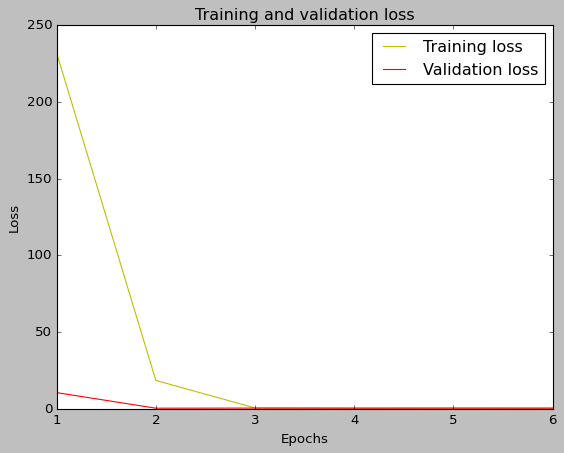

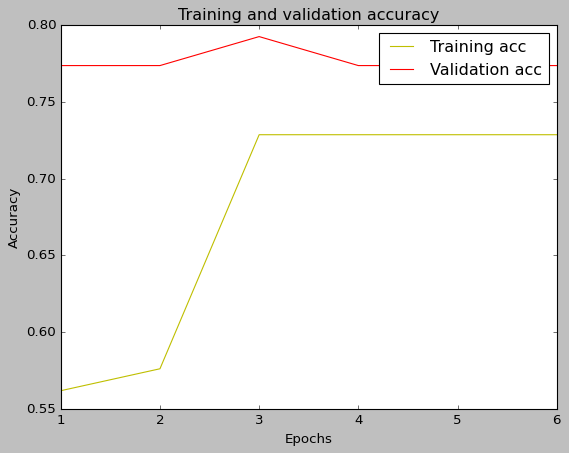

In [72]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
import tensorflow as tf
import cv2 as cv
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
path1 = glob.glob("/Test/*.BMP")
print(path1)
SIZE = 100

#test_img = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  

Load_image = tf.keras.preprocessing.image.load_img(path1[0])
n = cv.imread(path1[0],cv.COLOR_BGR2GRAY)
n.resize((SIZE,SIZE))

#img = X_test[10]
input_img = np.expand_dims(n, axis=0)
print(n)

#plt.imshow(n)
prediction=model.predict(input_img)
#input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
#print("The prediction for this image is: ", model.predict(input_img))
print(prediction)
#classes = label[np.argmax(prediction)]
#print(classes)
#print(label)
#print("The actual label for this image is: ", y_test[n])


['/Test/normal.BMP']
[[177 133 141 ... 139 147 181]
 [139 147 181 ... 147 187 139]
 [147 189 141 ... 179 137 143]
 ...
 [141 147 191 ... 149 185 143]
 [149 181 133 ... 183 139 149]
 [183 139 149 ... 140 150 178]]
[[0.65575534]]


In [74]:
from keras.models import load_model
# load model
#model = load_model('cancer_model.h5')

#For 300 epochs, giving 82.5% accuracy

#_, acc = model.evaluate(X_test, y_test)
#print("Accuracy = ", (acc * 100.0), "%")